# Projeto Cardio Disease:
    O dataset abaixo apresenta 70.000 dados separados em 12 características distintas, tais como, idade, sexo, pressão arterial, colesterol, fumante ou não fumante etc. A classe alvo será a 'cardio', que será descrita como: '0' quando o paciente estiver saudável e '1' quando o paciente apresenta doença cardiovascular.

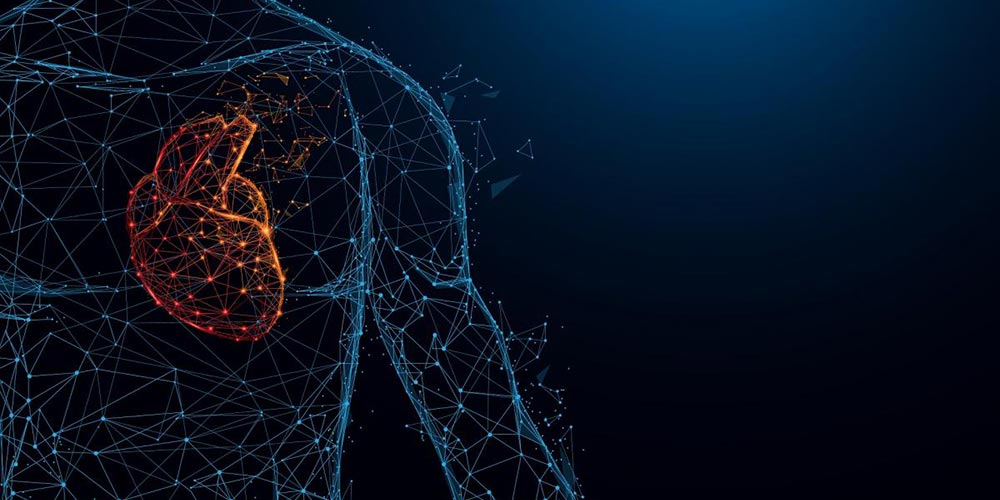

## Data Description
1. **Age** | Objective Feature | age | int (days)
2. **Height** | Objective Feature | height | int (cm) |
3. **Weight** | Objective Feature | weight | float (kg) |
4. **Gender** | Objective Feature | gender | categorical code | 1:woman 2: man
5. **Systolic blood pressure** | Examination Feature | ap_hi | int |
6. **Diastolic blood pressur**e | Examination Feature | ap_lo | int |
7. **Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. **Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. **Smoking** | Subjective Feature | smoke | binary |
10. **Alcohol intake** | Subjective Feature | alco | binary |
11.**Physical activity** | Subjective Feature | active | binary |
12. **Presence or absence of cardiovascular disease** | Target Variable | cardio | 1: disease 0: no|

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [4]:
n = None
df = pd.read_csv('cardio_train.csv', delimiter = ';', nrows = n)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#Data dimension
print("Number of rows: {}".format(df.shape[0]));
print("Number of columns: {}".format(df.shape[1]))
df.info()

Number of rows: 70000
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Preparando os dados

In [5]:
# Primeiro, para uma melhor análise iremos converter a unidade em 'dias'
# para 'anos' da coluna 'age'

df['age'] = df['age'].apply(lambda x: x/365)

df['age'] = df['age'].astype(int)

In [6]:
# Para melhor visualização, convertendo a variável categorica 'gender':
df['gender'].replace({1:'Woman', 2:'Man'}, inplace = True)

In [7]:
# Drop the ID column 
df = df.drop('id', axis = 1)

Importante analisar a **estatística descritiva** do dataset, a formula a seguir
retorna valores importantes do dataset por variável, tais como:
média, desvio padrão, valor máximo e mínimo.

In [8]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Se olharmos com mais detalhe a tabela acima é possível observar alguns valores que poderá ser um erro ou outlier que irá prejudicar as análises futuras. Por exemplo:
        1. minimum height está como 55 cm
        2. minimum weight está como 10kg
        3. minimum pressão sistólica e diastólica negativas
        4. Importante verificar se existe algum dado em que a diastólica está maior que a sistólica, o que é impossível de ocorrer.
        
Podemos afirmar que é um erro, pois a idade mínima do dataset é 29 anos.
Assim, importante tratar os outliers antes de iniciar uma análise mais aprofundada:

In [9]:
# Detecção e remoção de outliers pela abordagem de Intervalo Interquartil (IQR)

def remove_outlier(col):
    
    Q1 = np.percentile(df[col], 25,
                  interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,
                  interpolation = 'midpoint')
    IQR = Q3 - Q1
    print('Old Shape: ', df.shape)

    upper = np.where(df[col] >= (Q3+1.5*IQR))
    lower = np.where(df[col] <= (Q1-1.5*IQR))

    # Remove outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print ('New Shape: ', df.shape)

In [10]:
remove_outlier('height')

Old Shape:  (70000, 12)
New Shape:  (69481, 12)


In [11]:
# Analisando as variáveis 'ap_hi' e 'ap_lo'
print('Pressão siastólica é maior que a diastólica em {0} casos'.format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Pressão siastólica é maior que a diastólica em 1221 casos


In [12]:
# Utilizaremos outro método para tratar os outliers da pressão sistólica e diastólica
# 1. Pressão diastólica e sistólica não podem ser valores negativos
# 2. Pressão diastólica não poderá ser maior que a pressão sistólica, assim:

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

print("Pressão siastólica é maior que a diastólica em {0} casos".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Pressão siastólica é maior que a diastólica em 0 casos


In [13]:
display (df.describe())
display (df.shape)

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725
std,6.759225,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951
min,29.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(65708, 12)

In [14]:
# Com as variáveis weight e height em mãos, será interessante para análise
# criar a coluna de 'IMC'. É sabido que o IMC poderá ter forte correlação
# com doenças cardiovasculares. Valores normais do IMC variam entre o intervalo de  18.5 até 25.

df['IMC'] = df['weight']/((df['height']/100)**2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50,Man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,Woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,Woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,Man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,Woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


## Análise Exploratória

In [17]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725,27.406913
std,6.759225,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951,5.119358
min,29.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,58.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110279
max,64.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


    Para iniciar a análise exploratória é importante verificar se os dados da variável target 'cardio' estão balanceados no dataset, uma vez que dados desbalanceados podem acarretar em problemas na construção de modelos e geração de previsões.


In [18]:
# Verificando a distribuição da variável 'cardio' no dataset:
# Get a count of the number of individuals with cardio

display (df['cardio'].value_counts());
display (print("\nPacientes com doenças cardíacas representam {:.2f}% do dataset.\n".format((df[df.cardio == 1].shape[0] / df.shape[0]) * 100)));


0    33332
1    32376
Name: cardio, dtype: int64


Pacientes com doenças cardíacas representam 49.27% do dataset.



None

In [7]:
#Estilo / design para os gráficos
plt.style.use('ggplot')

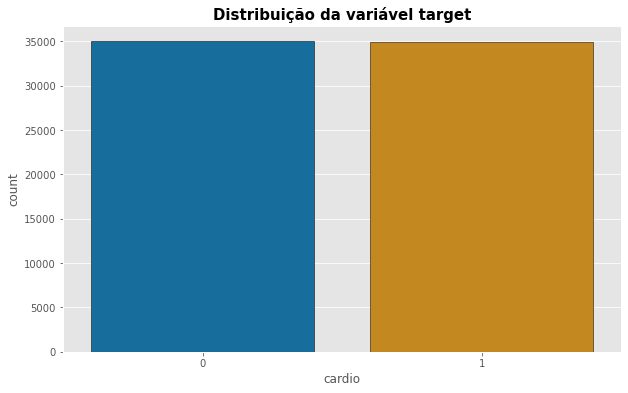

In [8]:
# visualize the amount of cardio disease in the dataset
# Podemos afirmar que a variável target está balanceada ao longo do dataset

plt.figure(figsize=(10,6))
fig = sns.countplot(x='cardio', data=df, palette='colorblind', edgecolor='black')
fig.set_title('Distribuição da variável target', fontsize = 15, weight = 'bold');

    A primeira análise que iremos realizar é a influência da idade com o surgimento das doenças cardiacas. É possível afirmar que quanto maior a idade, maior a probabilidade de se desenvolver doenças cardíacas?

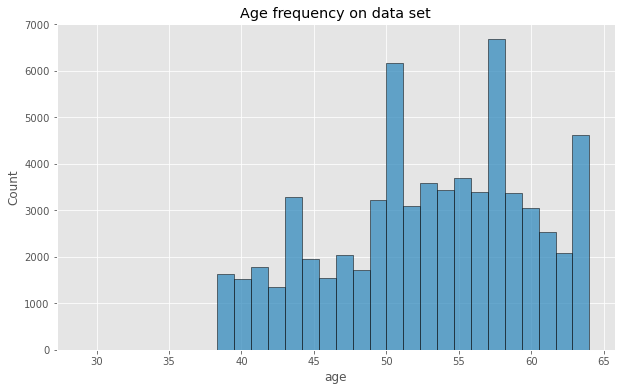

In [21]:
# Primeiro passo: analisar a distribuição da variável idade no dataset:
#Age frequency on the dataset

plt.figure(figsize=(10,6))
plt.title('Age frequency on data set')

sns.histplot(data=df, x = 'age', bins = 30, edgecolor ='black');

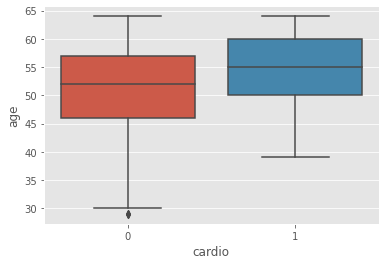

In [22]:
# Categorica x Numerica
sns.boxplot(x="cardio", y="age", data=df);

<Figure size 1440x1296 with 0 Axes>

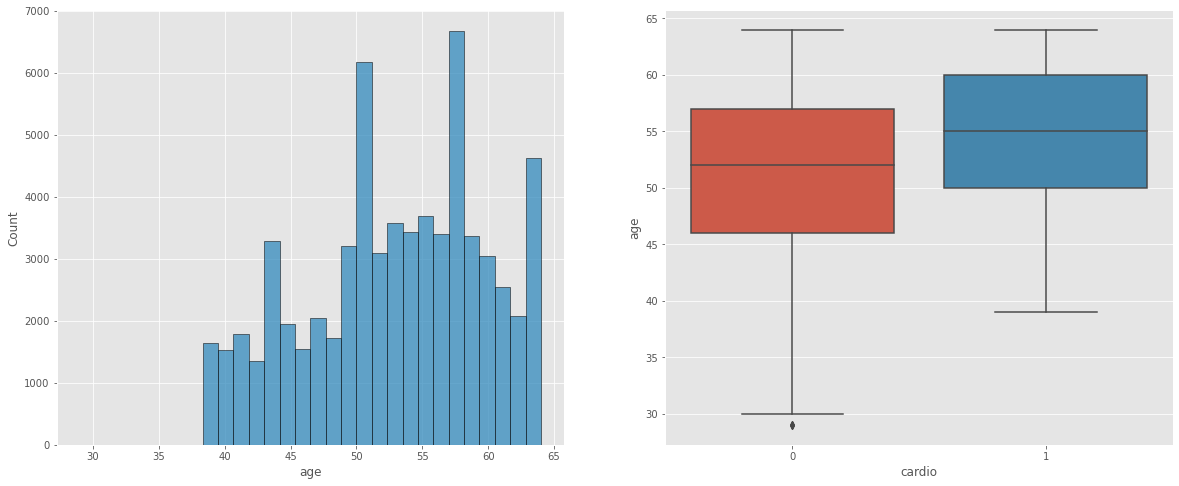

In [23]:
plt.figure (figsize = (20,18))
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20,8));
plt.tight_layout;


sns.histplot(data=df, x = 'age', bins = 30,  edgecolor ='black', ax = axes[0]);
sns.boxplot(x="cardio", y="age", data=df, ax = axes[1]);

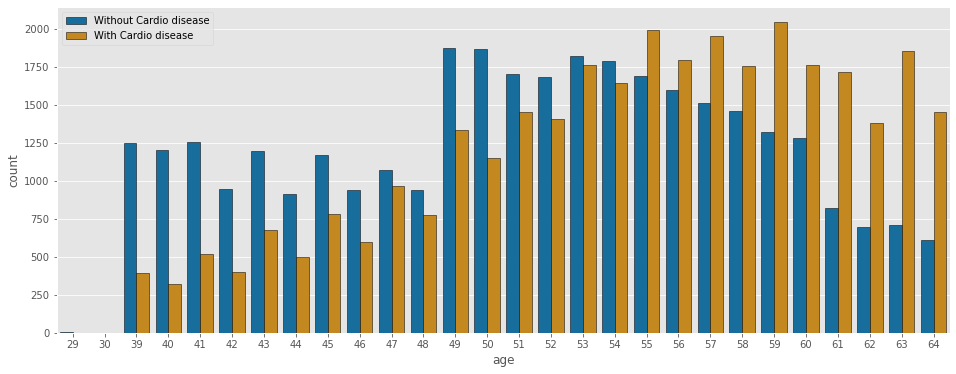

In [24]:
# Segundo passo: analisar se há correlação entre idade e surgimento
# de doenças cardíacas:
# Age x Cardio#

# O gráfico abaixo demonstra claramente que existe uma tendência no data set
# que após a idade de 55 anos, a amostra de pacientes com doenças cardíacas é
# maior que dos pacientes sem doenças cardíacas. 

plt.figure(figsize=(16,6))
fig = sns.countplot(x='age', hue='cardio', data=df, 
                    palette='colorblind', 
                    edgecolor='black')
plt.legend(labels =['Without Cardio disease','With Cardio disease'], 
           loc='upper left');


    A segunda análise a ser feita é: existe uma correlação entre gênero e a presença de doença cardíaca?

In [32]:
#Number per gender
df['gender'].value_counts()

Woman    42800
Man      22908
Name: gender, dtype: int64

In [9]:
#Percentual -> normalize = True
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


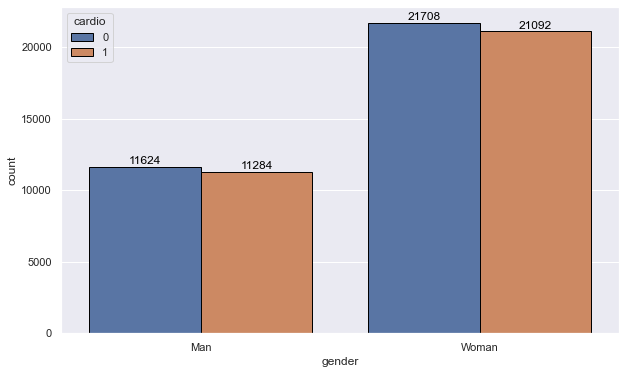

In [46]:
#Gender x Cardio - Count number by gender who have cardio disease
                #  1: man and 2: woman      
#Aparentemente não há correlação entre gênero e presença de doenças cardíacas

plt.figure(figsize=(10,6))
sns.set(font_scale = 1)

ax = sns.countplot(x='gender', hue='cardio', data=df, 
                    palette='deep', 
                    edgecolor='black')

for i in ax.patches:
    ax.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', fontsize = 12, color = 'black',
               xytext = (0,3),
               textcoords = 'offset points')


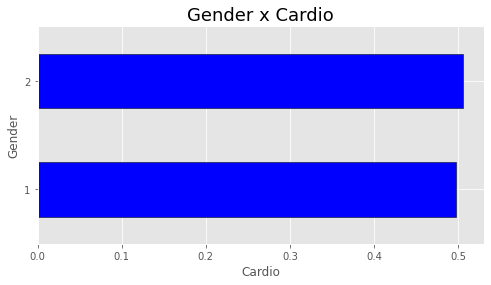

In [11]:
plt.figure(figsize=(8,4))
df.groupby('gender')['cardio'].mean().plot.barh(color = 'blue', edgecolor ='black')

plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Gender x Cardio', fontsize = 18, color = 'black');

Vamos analisar a relação entre as variáveis categórias e variável target




**1. Cholesterol:** 1: normal, 2: above normal, 3: well above normal 
    

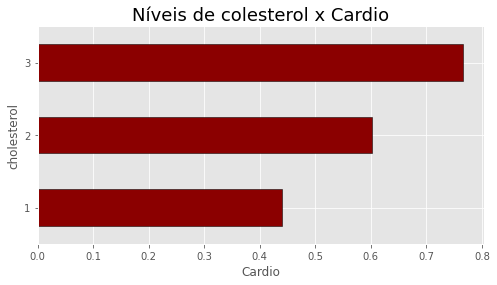

In [12]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Níveis de colesterol x Cardio', fontsize = 18, color = 'black')

df.groupby('cholesterol')['cardio'].mean().plot.barh(color='darkred',
                                               edgecolor ='black');

2. **Gluc x Cardio**
Claramente possível observar que quanto maior o nível de glicose (1: normal, 2: above normal, 3: well above normal), maior a amostra de presença de doença cardíaca

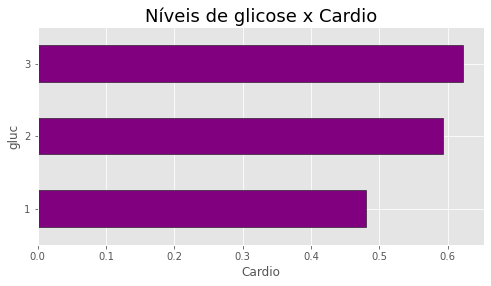

In [13]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gluc', fontsize=12)
plt.title('Níveis de glicose x Cardio', fontsize = 18, color = 'black')
df.groupby('gluc')['cardio'].mean().plot.barh(color='purple',
                                               edgecolor ='black');


In [16]:
# correlation between the data
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


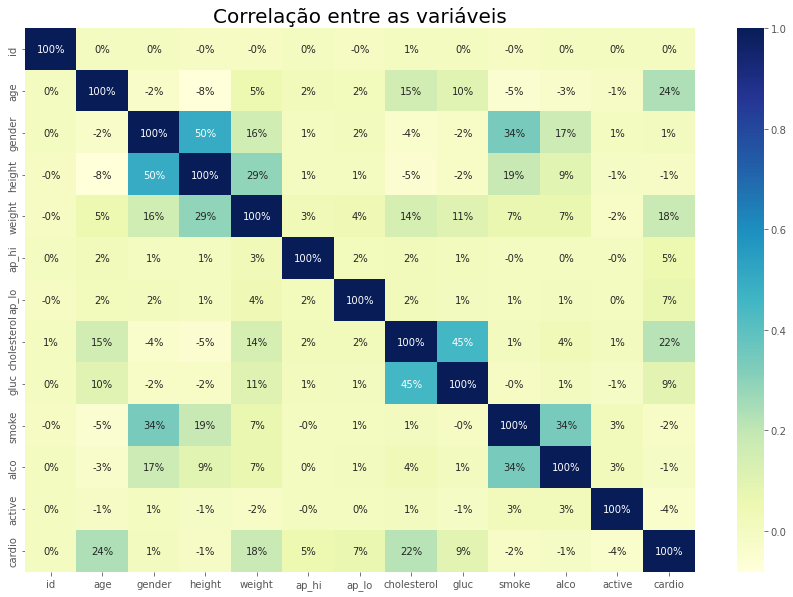

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Correlação entre as variáveis', fontsize = 20);